<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [73]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [74]:
# Answer:
#print(type(movies))
size = movies.shape
#print(type(size))
print("There are " + str(size[0]) + " rows and " + str(size[1]) + " columns.")

There are 979 rows and 6 columns.


#### Check the data type of each column.

In [75]:
# Answer:
information = movies.info()
print(information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB
None


#### Calculate the average movie duration.

In [76]:
# Answer:

total_duration = movies['duration'].sum()
#print (total_duration)
total_movies = movies['duration'].count()
#print(total_movies)
avg_duration = total_duration/total_movies
print("Average movie duration is: " + str(round(avg_duration,2)) + " mins.")

Average movie duration is: 120.98 mins.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [77]:
# Answer:

sort_duration = movies.sort_values('duration', ascending = True)

print("The shortest movie is " + sort_duration['title'].iloc[0] + ", and it is " 
      + str(sort_duration['duration'].iloc[0]) + " mins long")
print("The longest movie is " + sort_duration['title'].iloc[-1] + ", and it is " 
      + str(sort_duration['duration'].iloc[-1]) + " mins long")
#print(sort_duration['duration'].iloc[0])
#print(sort_duration['title'].iloc[333])
#print(sort_duration['duration'].iloc[333])
#print(sort_duration['title'].iloc[657])
#print(sort_duration['duration'].iloc[657])
#print(sort_duration['title'].iloc[-1])
#print(sort_duration['duration'].iloc[-1])

The shortest movie is Freaks, and it is 64 mins long
The longest movie is Hamlet, and it is 242 mins long


#### Create a histogram of duration, choosing an "appropriate" number of bins.

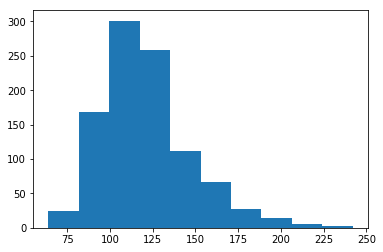

In [78]:
# Answer:
plt.hist(movies['duration'], bins = 10)
plt.show()

#### Use a box plot to display that same data.

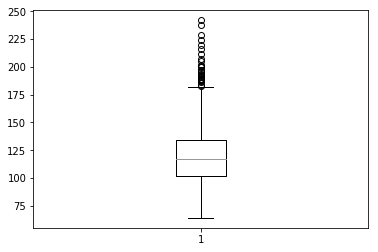

In [79]:
# Answer:
plt.boxplot(movies['duration'])
plt.show()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [80]:
# Answer:
rating_count = movies.groupby('content_rating').size()
sort_rating_count = rating_count.sort_values(ascending = False)
#movies.content_rating.value_counts()
print (sort_rating_count)
#print(type(rating_count))

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

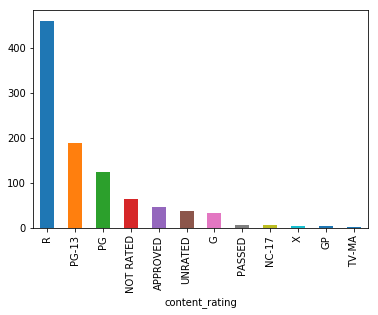

In [81]:
# Answer:
#convert rating_count into 2 lists
#rating_count = rating_count.tolist()
#print(rating_count_list)
#print(rating_count)

sort_rating_count.plot(kind = 'bar')
#movies.groupby('content_rating').plot(kind = 'bar')
#movies.content_rating.value_counts().plot(kind = 'bar')
#plt.bar(movies('content_rating'), rating_count)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [114]:
# Answer:
movies.content_rating = movies.content_rating.replace("NOT RATED", "UNRATED")
movies.content_rating = movies.content_rating.replace("APPROVED", "UNRATED")
movies.content_rating = movies.content_rating.replace("PASSED", "UNRATED")
movies.content_rating = movies.content_rating.replace("GP", "UNRATED")
movies.content_rating.value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [116]:
# Answer:
movies.content_rating = movies.content_rating.replace("X", "NC-17")
movies.content_rating = movies.content_rating.replace("TV-MA", "NC-17")

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [121]:
# Answer:
movies.count()
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [256]:
# Answer:
#movies = movies.content_rating.replace(null, )

'''Below shows that the the 'Nan' ratings are from Butch Cassidy(genre: 'Biography')
Eagles Dare (genre: 'Action')
True Grit (genre: Adventure)
'''

is_null = movies[movies.isnull().any(axis=1)]
#print(movies[movies.isnull().any(axis=1)])
#print(is_null)
#print (type(is_null))

#Here, we try to find out the "mode" of each category to replace the NaN values with.
#"Mode" for Biography is 'R', Adventure is 'PG-13', Action is 'R'
genre_count = movies.groupby(['genre']).size()
genre_biography = movies.groupby(['genre','content_rating']).size()
#print(genre_count)
#print(genre_biography)

for movie in movies.iterrows():
    #print(type(movie))
    print(movie)
    #change to a list to access index
    print(list((movie)))
    print(type(movie))
    if movie['title'] == "Butch Cassidy and the Sundance Kid":
        print("Found")
        #movies.content_rating = movies.content_rating.replace("", "NC-17")
 

#print(movies.iloc[187])   
#print((movies.at[187, 'content_rating']))

(0, star_rating                                                     9.3
title                                      The Shawshank Redemption
content_rating                                                    R
genre                                                         Crime
duration                                                        142
actors_list       [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
Name: 0, dtype: object)
[0, star_rating                                                     9.3
title                                      The Shawshank Redemption
content_rating                                                    R
genre                                                         Crime
duration                                                        142
actors_list       [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
Name: 0, dtype: object]
<class 'tuple'>


TypeError: tuple indices must be integers or slices, not str

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [204]:
# Answer:
long_movies = []
short_movies = []

for movie in movies.iterrows():
    if movie['duration'] <= 120:
        long_movies = long_movies.append(duration)
#long_movies = movies.groupby('duration').mean()
print(long_movies)

#total_duration = movies['duration'].sum()
#print (total_duration)
#total_movies = movies['duration'].count()
#print(total_movies)
#avg_duration = total_duration/total_movies
#print("Average movie duration is: " + str(round(avg_duration,2)) + " mins.")

TypeError: tuple indices must be integers or slices, not str

#### Use a visualization to detect whether there is a relationship between duration and star rating.

There does not seem to have any relationship


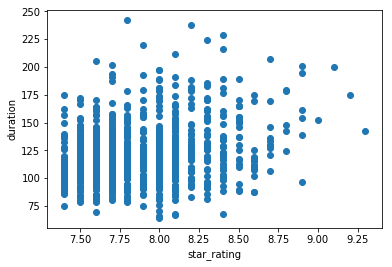

In [240]:
# Answer:

plt.scatter(movies['star_rating'],movies['duration'])
plt.xlabel('star_rating')
plt.ylabel('duration')

print("There does not seem to have any relationship")

#### Calculate the average duration for each genre.

In [88]:
# Answer:


## Advanced level

#### Visualize the relationship between content rating and duration.

In [254]:
# Answer:

#### Determine the top rated movie (by star rating) for each genre.

In [90]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [91]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [92]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [93]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [94]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [95]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!